<a href="https://colab.research.google.com/github/firouzdimas/Data-Analyst-Data-Science-Mini-Portofolio/blob/main/Finpro_Firouz_Dimas__S_MisstatementPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Accounting Fraud 

### MODELLING

Setelah dilakukan Exploratory data, kemudian akan dibangun sistem prediksi kecurangan pada laporan keuangan berdasarkan misstatement

In [ ]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine.selection import DropFeatures
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load Data
df_misstate = pd.read_csv('data_FraudDetection_JAR2020.csv')
df_misstate

,fyear,gvkey,p_aaer,misstate,act,ap,at,ceq,che,cogs,...,soft_assets,ch_cs,ch_cm,ch_roa,issue,bm,dpi,reoa,EBIT,ch_fcf
0,1990,1009,NaN,0,10.047,3.736,32.335,6.262,0.002,30.633,...,0.312448,0.095082,0.082631,-0.019761,1,0.413170,0.873555,0.167620,0.161961,-0.042140
1,1990,1011,NaN,0,1.247,0.803,7.784,0.667,0.171,1.125,...,0.315904,0.188832,-0.211389,-0.117832,1,0.157887,0.745139,-0.428957,-0.157888,0.100228
2,1990,1017,NaN,0,55.040,3.601,118.120,44.393,3.132,107.343,...,0.605342,0.097551,-0.105780,0.091206,1,2.231337,1.015131,0.394768,0.063681,0.066348
3,1990,1021,NaN,0,24.684,3.948,34.591,7.751,0.411,31.214,...,0.793068,-0.005725,-0.249704,0.017545,1,1.043582,1.026261,0.094822,0.088347,-0.017358
4,1990,1028,NaN,0,17.325,3.520,27.542,-12.142,1.017,32.662,...,0.869182,-0.231536,-1.674893,-0.466667,0,-1.602508,0.598443,-0.942379,-0.700821,0.130349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146040,2014,314866,NaN,0,262.600,12.400,1234.800,194.100,166.200,214.400,...,0.751944,0.560406,0.127217,-0.050591,1,0.103693,0.829680,-0.327178,-0.008179,-0.261606
146041,2014,315318,NaN,0,1578.400,106.700,4557.600,2459.600,997.300,324.400,...,0.742781,-0.118178,0.031360,0.095355,1,0.581796,0.743084,-0.077826,0.000461,-0.296702
146042,2014,316056,NaN,0,973.800,249.500,2015.900,-4.800,290.500,1185.500,...,0.751129,0.004207,-0.037925,0.072050,1,-0.000903,1.063878,-0.002877,0.153133,0.065569
146043,2014,317260,NaN,0,51.743,1.555,322.421,319.230,46.398,24.319,...,0.018001,NaN,NaN,NaN,1,1.109467,NaN,0.000000,0.028804,NaN


In [ ]:
df_misstate.columns

### Preprocessing

In [ ]:
#Tranformer

#All
#ini untuk drop feature yang unique dan missing value nya banyak
#class DropFeature(BaseEstimator, TransformerMixin):
#   def __init__(self, var):
#   def fit(self, X, y = None):
#     return self
#   def transform(self, X):
#       X.drop(self.var, axis = 1)
#       return X

#Tapi kemudian memakai dropfeatures


#untuk mengisi na dengan median
class FillNaa(BaseEstimator, TransformerMixin):
    def __init__(self, var=None):
        self.var = var
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        X = X.fillna(X.median())
        return X

#class DropNa(BaseEstimator, TransformerMixin):
 #   def __init__(self, var=None):
  #      self.var = var
   # def fit(self, X, y = None):
    #    return self
    #def transform(self, X):
     #   X.dropna(inplace = True)
      #  return X



In [ ]:
#X untuk features dan y untuk label
X = df_misstate.drop(['misstate'], axis=1)
y = df_misstate['misstate']

#### Split data train, test, validation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

### Baseline Model

Pertama, membangun model menggunakan random forest dengan metode yang sangat dasar

### Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
drop_this = ['fyear', 'gvkey', 'p_aaer']

transformator_pipe = Pipeline(steps=
        [('DropFeature', DropFeatures(drop_this)),
        ('Fillna', FillNaa())]
)

In [ ]:
RF_base = Pipeline(steps=[
    ('transfromator', transformator_pipe),
    ('scaler', MinMaxScaler()),
    ('modelRFbase', model)
]
)

In [ ]:
RF_base.fit(X_train,y_train)

Pipeline(steps=[('transfromator',
                 Pipeline(steps=[('DropFeature',
                                  DropFeatures(features_to_drop=['fyear',
                                                                 'gvkey',
                                                                 'p_aaer'])),
                                 ('Fillna', FillNaa())])),
                ('scaler', MinMaxScaler()),
                ('modelRFbase', RandomForestClassifier(random_state=42))])

In [ ]:
preds = RF_base.predict(X_eval)

In [ ]:
print('recall', recall_score(y_eval, preds))

recall 0.0


In [ ]:
print('f1_score', f1_score(y_eval, preds))

f1_score 0.0


In [ ]:
preds = RF_base.predict(X_test)

In [ ]:
print('recall', recall_score(y_test, preds))

recall 0.07857142857142857


In [ ]:
print('f1_score', f1_score(y_test, preds))

f1_score 0.09734513274336283


Hasil yang diperoleh untuk baseline tidak bagus. saya mengidentifikasi bahwa data yang saya gunakan tidak balance.

#### Xgboost

In [ ]:
####
modelxg = XGBRFClassifier()

In [ ]:
XG_base = Pipeline(steps=[
    ('transfromator', transformator_pipe),
    ('scaler', MinMaxScaler()),
    ('modelXG', modelxg)
]
)

In [ ]:
XG_base.fit(X_train,y_train)

Pipeline(steps=[('transfromator',
                 Pipeline(steps=[('DropFeature',
                                  DropFeatures(features_to_drop=['fyear',
                                                                 'gvkey',
                                                                 'p_aaer'])),
                                 ('Fillna', FillNaa())])),
                ('scaler', MinMaxScaler()),
                ('modelXG',
                 XGBRFClassifier(base_score=0.5, booster='gbtree',
                                 callbacks=None, colsample_bylevel=1,
                                 colsample_bytree=1, early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=...
                                 grow_policy='depthwise', importance_type=None,
                                 interaction_constraints='', max_bin=256,
                                 max_cat_threshold=64, max_cat_to_onehot=4,
                                 max_delta_step=0, max_depth=6, max_leaves=0,
                                 min_child_weight=1, missing=nan,
                                 monotone_constraints='()', n_estimators=100,
                                 n_jobs=0, num_parallel_tree=100,
                                 objective='binary:logistic', predictor='auto',
                                 random_state=0, reg_alpha=0, ...))])

In [ ]:
predsxg = XG_base.predict(X_eval)

In [ ]:
print('recall', recall_score(y_eval, predsxg))

recall 0.0


In [ ]:
print('f1-score', f1_score(y_eval, predsxg))

f1-score 0.0


In [ ]:
predsxg = XG_base.predict(X_test)

In [ ]:
print('recall', recall_score(y_test, predsxg))

recall 0.5071428571428571


In [ ]:
print('f1-score', f1_score(y_test, predsxg))

f1-score 0.02871587462082912


### Naive Bayes

In [ ]:
modelgaus = GaussianNB()

In [ ]:
NB_base = Pipeline(steps=[
    ('transfromator', transformator_pipe),
    ('scaler', MinMaxScaler()),
    ('modelNB', modelgaus)
]
)

In [ ]:
NB_base.fit(X_train,y_train)

Pipeline(steps=[('transfromator',
                 Pipeline(steps=[('DropFeature',
                                  DropFeatures(features_to_drop=['fyear',
                                                                 'gvkey',
                                                                 'p_aaer'])),
                                 ('Fillna', FillNaa())])),
                ('scaler', MinMaxScaler()), ('modelNB', GaussianNB())])

In [ ]:
predsnb = NB_base.predict(X_eval)

In [ ]:
print('recall', recall_score(y_eval, predsnb))

recall 0.10897435897435898


In [ ]:
print('F1-score', f1_score(y_eval, predsnb))

F1-score 0.03567681007345226


In [ ]:
predsnb = NB_base.predict(X_test)

In [ ]:
print('recall', recall_score(y_test, predsnb))

recall 0.17857142857142858


#### Check Imbalanced

In [ ]:
target = df_misstate['misstate'].value_counts().reset_index()
target.rename(columns={'index':'misstate','misstate':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,misstate,freq,percentage
0,0,145081,99.34
1,1,964,0.66


Terlihat diatas bahwa data ini tidak balance, dengan perbandinganyang sangat tinggi. Sehingga perlu dilakukan balancing data

In [ ]:
smote = SMOTE()
smote_enn = make_pipeline(FillNaa(), SMOTETomek(smote=smote))
X_res, y_res = smote_enn.fit_resample(X_train, y_train)

In [ ]:
print(f'''Shape of X before SMOTE: {X_train.shape}
Shape of X after SMOTE: {X_res.shape}''')

print('\nBalance of positive and negative classes (%):')
y_res.value_counts(normalize=True) * 100

Shape of X before SMOTE: (99310, 45)
Shape of X after SMOTE: (197282, 45)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: misstate, dtype: float64

### Random Forest menggunakan Balanced data

In [ ]:
RF_base.fit(X_res,y_res)

Pipeline(steps=[('transfromator',
                 Pipeline(steps=[('DropFeature',
                                  DropFeatures(features_to_drop=['fyear',
                                                                 'gvkey',
                                                                 'p_aaer'])),
                                 ('Fillna', FillNaa())])),
                ('scaler', MinMaxScaler()),
                ('modelRFbase', RandomForestClassifier(random_state=42))])

In [ ]:
preds1 = RF_base.predict(X_eval)

In [ ]:
print('recall', recall_score(y_eval, preds1))

recall 0.08333333333333333


In [ ]:
print('f1_score', f1_score(y_eval, preds1))

f1_score 0.10317460317460315


In [ ]:
preds1 = RF_base.predict(X_test)
print('recall', recall_score(y_test, preds1))

recall 0.07857142857142857


Nilai recall yang diperoleh masih kecil meskipun sudah dilakukan balancing data, tetapi nilai yang diperoleh lebih baik daripada baseline

### XgBoost menggunakan Balanced data

In [ ]:
XG_base.fit(X_res,y_res)

Pipeline(steps=[('transfromator',
                 Pipeline(steps=[('DropFeature',
                                  DropFeatures(features_to_drop=['fyear',
                                                                 'gvkey',
                                                                 'p_aaer'])),
                                 ('Fillna', FillNaa())])),
                ('scaler', MinMaxScaler()),
                ('modelXG',
                 XGBRFClassifier(base_score=0.5, booster='gbtree',
                                 callbacks=None, colsample_bylevel=1,
                                 colsample_bytree=1, early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=...
                                 grow_policy='depthwise', importance_type=None,
                                 interaction_constraints='', max_bin=256,
                                 max_cat_threshold=64, max_cat_to_onehot=4,
                                 max_delta_step=0, max_depth=6, max_leaves=0,
                                 min_child_weight=1, missing=nan,
                                 monotone_constraints='()', n_estimators=100,
                                 n_jobs=0, num_parallel_tree=100,
                                 objective='binary:logistic', predictor='auto',
                                 random_state=0, reg_alpha=0, ...))])

In [ ]:
predsxg1 = XG_base.predict(X_eval)

In [ ]:
print('recall', recall_score(y_eval, predsxg1))

recall 0.532051282051282


In [ ]:
print('f1-score', f1_score(y_eval, predsxg1))

f1-score 0.02988836874324811


In [ ]:
predsxg1 = XG_base.predict(X_test)
print('recall', recall_score(y_test, predsxg1))

recall 0.5071428571428571


### Naive Bayes menggunakan Balanced data

In [ ]:
NB_base.fit(X_res,y_res)

Pipeline(steps=[('transfromator',
                 Pipeline(steps=[('DropFeature',
                                  DropFeatures(features_to_drop=['fyear',
                                                                 'gvkey',
                                                                 'p_aaer'])),
                                 ('Fillna', FillNaa())])),
                ('scaler', MinMaxScaler()), ('modelNB', GaussianNB())])

In [ ]:
predsnb1 = NB_base.predict(X_eval)

In [ ]:
print('recall', recall_score(y_eval, predsnb1))

recall 0.22435897435897437


In [ ]:
print('F1_score', f1_score(y_eval, predsnb1))

F1_score 0.032302722658052604


In [ ]:
predsnb1 = NB_base.predict(X_test)
print('recall', recall_score(y_test, predsnb1))

recall 0.17857142857142858


### Random Forest menggunakan Balanced data & hyperparameter Tunning

In [ ]:
parameters = {
    'modelRFbase__n_estimators': (10,20,30,40,50),
    'modelRFbase__max_depth':(1,2,3,4,5)
}

model_gridcv = GridSearchCV(estimator = RF_base, param_grid = parameters, cv=4, scoring='recall')
model_gridcv.fit(X_res, y_res)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transfromator',
                                        Pipeline(steps=[('DropFeature',
                                                         DropFeatures(features_to_drop=['fyear',
                                                                                        'gvkey',
                                                                                        'p_aaer'])),
                                                        ('Fillna',
                                                         FillNaa())])),
                                       ('scaler', MinMaxScaler()),
                                       ('modelRFbase',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'modelRFbase__max_depth': (1, 2, 3, 4, 5),
                         'modelRFbase__n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(model_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
21,"{'modelRFbase__max_depth': 5, 'modelRFbase__n_...",0.849140,1
23,"{'modelRFbase__max_depth': 5, 'modelRFbase__n_...",0.844821,2
24,"{'modelRFbase__max_depth': 5, 'modelRFbase__n_...",0.844760,3
20,"{'modelRFbase__max_depth': 5, 'modelRFbase__n_...",0.839387,4
22,"{'modelRFbase__max_depth': 5, 'modelRFbase__n_...",0.839276,5
14,"{'modelRFbase__max_depth': 3, 'modelRFbase__n_...",0.808508,6
19,"{'modelRFbase__max_depth': 4, 'modelRFbase__n_...",0.808376,7
16,"{'modelRFbase__max_depth': 4, 'modelRFbase__n_...",0.804746,8
11,"{'modelRFbase__max_depth': 3, 'modelRFbase__n_...",0.804229,9
10,"{'modelRFbase__max_depth': 3, 'modelRFbase__n_...",0.801827,10


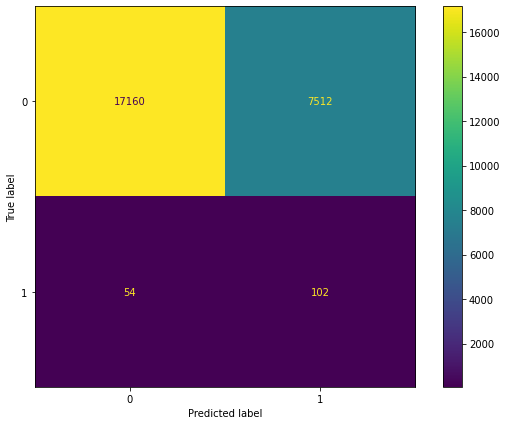

In [ ]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = model_gridcv.best_estimator_.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred, labels=model_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = model_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82     21767
           1       0.01      0.66      0.03       140

    accuracy                           0.70     21907
   macro avg       0.51      0.68      0.42     21907
weighted avg       0.99      0.70      0.82     21907



### Xgboost menggunakan Balanced data & hyperparameter Tunning

In [ ]:
parameters = {
    'modelXG__n_estimators': (10,20,30,40,50),
    'modelXG__max_depth':(1,2,3,4,5)
}

model_gridcvxg = GridSearchCV(estimator = XG_base, param_grid = parameters, cv=4, scoring='recall')
model_gridcvxg.fit(X_res, y_res)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transfromator',
                                        Pipeline(steps=[('DropFeature',
                                                         DropFeatures(features_to_drop=['fyear',
                                                                                        'gvkey',
                                                                                        'p_aaer'])),
                                                        ('Fillna',
                                                         FillNaa())])),
                                       ('scaler', MinMaxScaler()),
                                       ('modelXG',
                                        XGBRFClassifier(base_score=0.5,
                                                        booster='gbtree',
                                                        callbacks=None,
                                                        colsample_bylevel=1,
                                                        colsample_bytree=1,
                                                        early_stopping_rounds=None,
                                                        enable_ca...
                                                        max_cat_to_onehot=4,
                                                        max_delta_step=0,
                                                        max_depth=6,
                                                        max_leaves=0,
                                                        min_child_weight=1,
                                                        missing=nan,
                                                        monotone_constraints='()',
                                                        n_estimators=100,
                                                        n_jobs=0,
                                                        num_parallel_tree=100,
                                                        objective='binary:logistic',
                                                        predictor='auto',
                                                        random_state=0,
                                                        reg_alpha=0, ...))]),
             param_grid={'modelXG__max_depth': (1, 2, 3, 4, 5),
                         'modelXG__n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(model_gridcvxg.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'modelXG__max_depth': 1, 'modelXG__n_estimato...",0.857828,1
2,"{'modelXG__max_depth': 1, 'modelXG__n_estimato...",0.857808,2
3,"{'modelXG__max_depth': 1, 'modelXG__n_estimato...",0.857797,3
4,"{'modelXG__max_depth': 1, 'modelXG__n_estimato...",0.857787,4
0,"{'modelXG__max_depth': 1, 'modelXG__n_estimato...",0.853195,5
22,"{'modelXG__max_depth': 5, 'modelXG__n_estimato...",0.841030,6
24,"{'modelXG__max_depth': 5, 'modelXG__n_estimato...",0.840330,7
21,"{'modelXG__max_depth': 5, 'modelXG__n_estimato...",0.840107,8
23,"{'modelXG__max_depth': 5, 'modelXG__n_estimato...",0.839985,9
20,"{'modelXG__max_depth': 5, 'modelXG__n_estimato...",0.838698,10


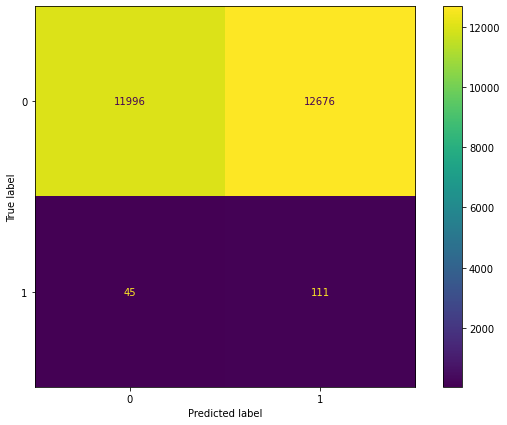

In [ ]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = model_gridcvxg.best_estimator_.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred, labels=model_gridcvxg.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_gridcvxg.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = model_gridcvxg.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.66     21767
           1       0.01      0.75      0.02       140

    accuracy                           0.50     21907
   macro avg       0.50      0.62      0.34     21907
weighted avg       0.99      0.50      0.66     21907



### Naive Bayes menggunakan Balanced data & hyperparameter Tunning

In [ ]:
parameters = {
    'modelNB__var_smoothing': np.logspace(0,-9, num=100)
}

model_gridcvnb = GridSearchCV(estimator = NB_base, param_grid = parameters, cv=4, scoring='recall')
model_gridcvnb.fit(X_res, y_res)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('transfromator',
                                        Pipeline(steps=[('DropFeature',
                                                         DropFeatures(features_to_drop=['fyear',
                                                                                        'gvkey',
                                                                                        'p_aaer'])),
                                                        ('Fillna',
                                                         FillNaa())])),
                                       ('scaler', MinMaxScaler()),
                                       ('modelNB', GaussianNB())]),
             param_grid={'modelNB__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(model_gridcvnb.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
0,{'modelNB__var_smoothing': 1.0},0.928113,1
10,{'modelNB__var_smoothing': 0.12328467394420659},0.926643,2
9,{'modelNB__var_smoothing': 0.15199110829529336},0.926298,3
11,{'modelNB__var_smoothing': 0.1},0.925964,4
8,{'modelNB__var_smoothing': 0.1873817422860384},0.925761,5
...,...,...,...
81,{'modelNB__var_smoothing': 4.3287612810830526e...,0.258389,80
80,{'modelNB__var_smoothing': 5.336699231206302e-08},0.258389,80
79,{'modelNB__var_smoothing': 6.579332246575682e-08},0.258389,80
88,{'modelNB__var_smoothing': 1e-08},0.258389,80


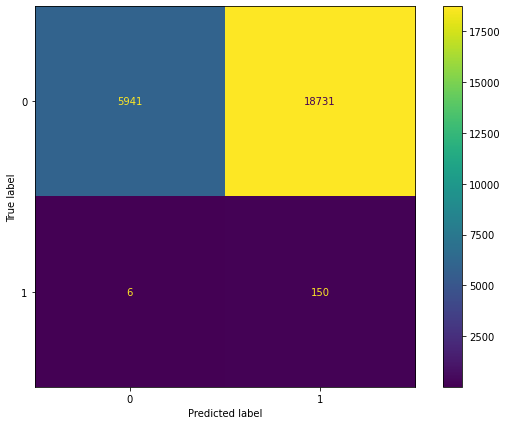

In [ ]:
# the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = model_gridcvnb.best_estimator_.predict(X_eval)

cm = confusion_matrix(y_eval, y_pred, labels=model_gridcvnb.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_gridcvnb.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = model_gridcvnb.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39     21767
           1       0.01      0.96      0.02       140

    accuracy                           0.24     21907
   macro avg       0.50      0.60      0.20     21907
weighted avg       0.99      0.24      0.38     21907

